## House Price Prediction Problem using Lasso and Ridge Regression.

In [1]:
#importing the all the libraries reqired for the program
import numpy as np
import pandas as pd
import seaborn as sns
from heapq import nlargest 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Storing the dataset in Housing_data 
Housing_data= pd.read_csv('C:/Users/Sharath Jois/Downloads/train.csv')

In [3]:
#Taking the head of the dataframe
Housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking the shape of the dataframe
Housing_data.shape

(1460, 81)

In [5]:
# Describing the dataframe to check the all the numerical columns
Housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Checking the type of each column
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Checking for dulicate in Id column
sum(Housing_data['Id'].duplicated())

0

In [8]:
#Dropping the Id column
Housing_data.drop('Id',axis = 1, inplace = True)

In [9]:
#storing the Housing_data dataframe to train dataframe
train = Housing_data

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


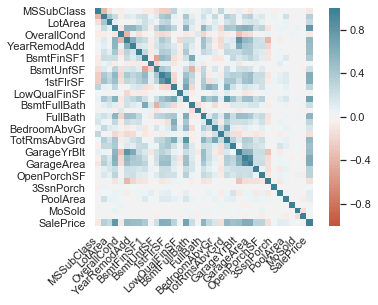

In [10]:
#Checking the correlation of the columns in the dataframe
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# printing the top 20 correlated variables in the dataframe
Highest_corr = corr.nlargest(20, 'SalePrice')['SalePrice']
print(Highest_corr)

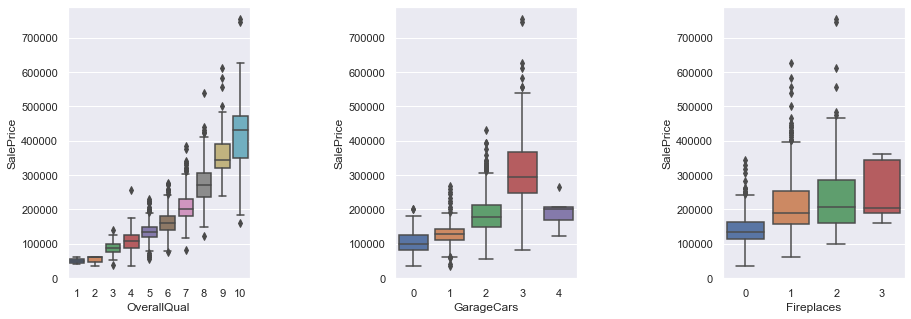

In [11]:
#Plotting the box plot for 3 columns wrt salesprice
f1, axes = plt.subplots(1, 3, figsize=(15,5))
f1.subplots_adjust(hspace=0.4, wspace=0.8)
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'],orient='v', ax=axes[0])
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'], orient='v', ax=axes[1])
sns.boxplot(x=train['Fireplaces'], y=train['SalePrice'], orient='v', ax=axes[2])

In [12]:
# Drop outliers with GarageCars = 4 but cheap Price
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<300000)].index).reset_index(drop=True)

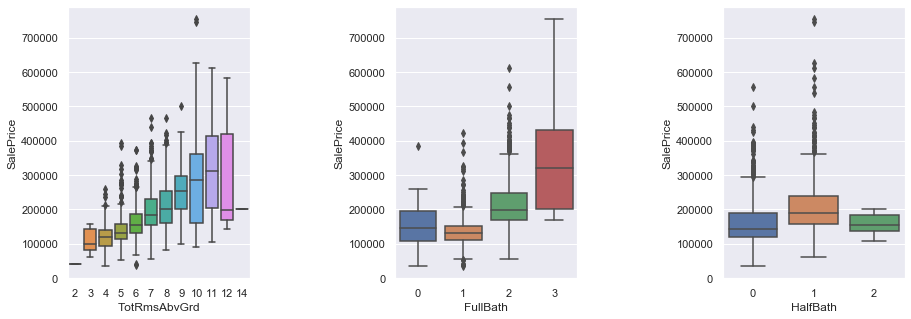

In [13]:
#Plotting the box plot for 3 columns wrt salesprice
f2, axes = plt.subplots(1, 3, figsize=(15,5))
f2.subplots_adjust(hspace=0.4, wspace=0.8)
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'],orient='v', ax=axes[0])
sns.boxplot(x=train['FullBath'], y=train['SalePrice'], orient='v', ax=axes[1])
sns.boxplot(x=train['HalfBath'], y=train['SalePrice'], orient='v', ax=axes[2])

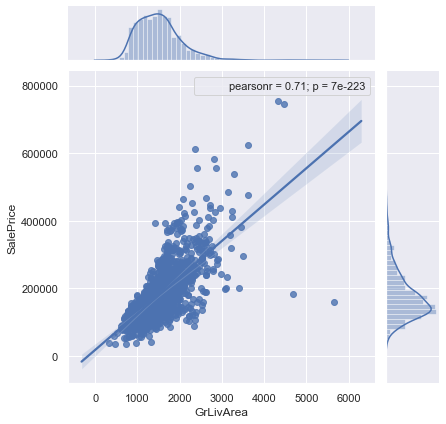

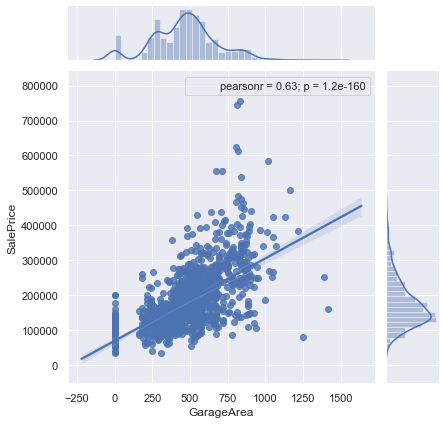

In [14]:
# Proceed with rest of data using jointplots
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)

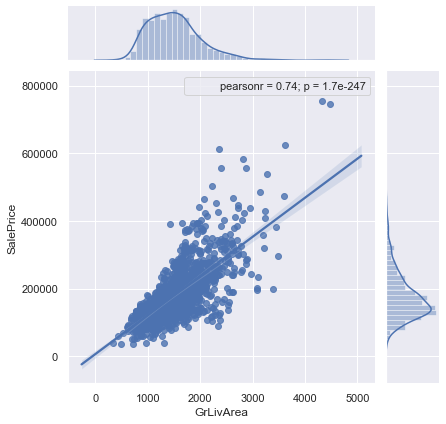

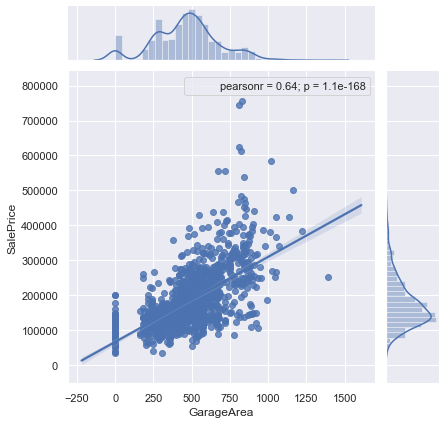

In [15]:
# Remove the two outliers on the bottom-right corner (high GrLivArea/GarageArea but cheap SalePrice)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index).reset_index(drop=True)
train = train.drop(train[(train['GarageArea']>1100) & (train['SalePrice']<200000)].index).reset_index(drop=True)
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)

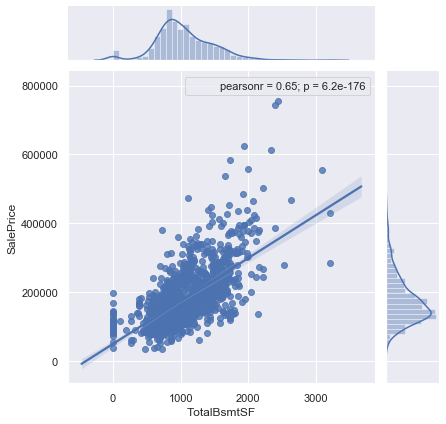

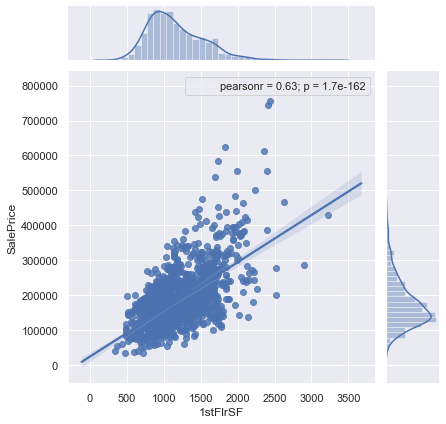

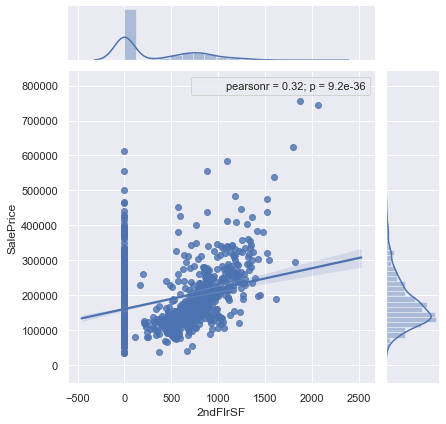

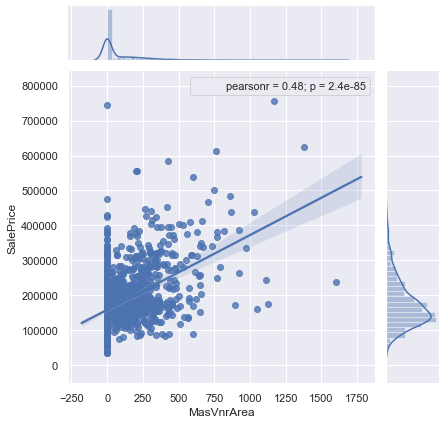

In [16]:
# Proceed with rest of data using jointplots
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['2ndFlrSF'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['MasVnrArea'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)

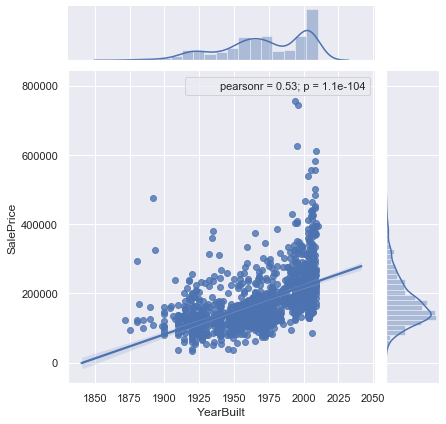

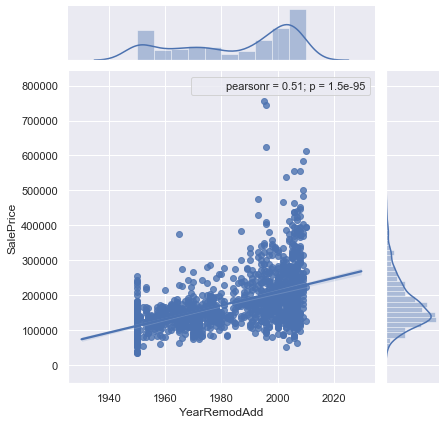

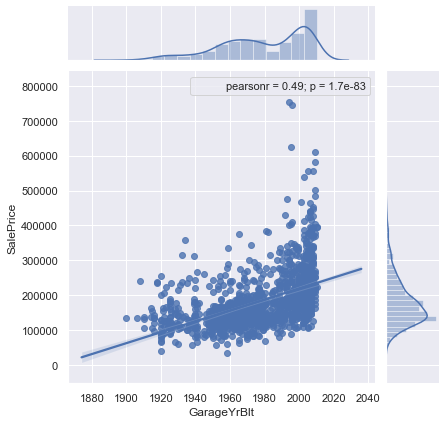

In [17]:
# Proceed with plotting of data using jointplots
sns.jointplot(x=train['YearBuilt'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['YearRemodAdd'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['GarageYrBlt'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)

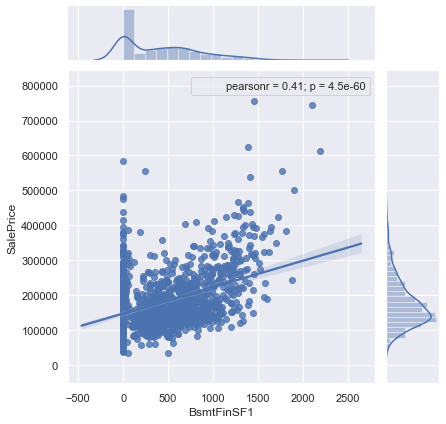

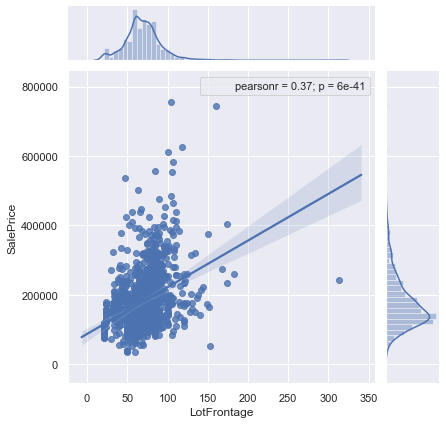

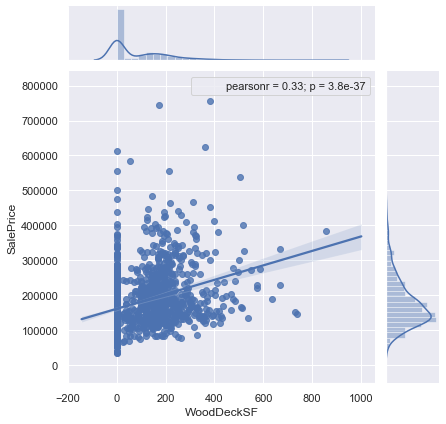

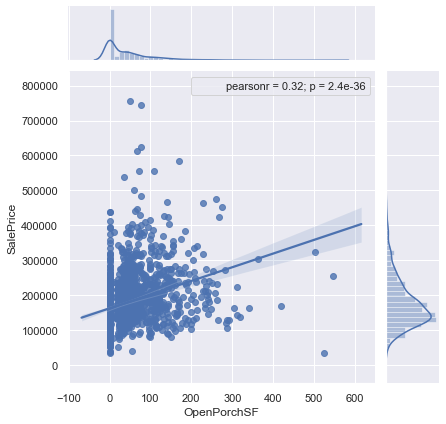

In [18]:
# The following columns have poor corelation with SalePrice. It is expected to find a low Pearson coeff and hence we won't clean data from them
sns.jointplot(x=train['BsmtFinSF1'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['LotFrontage'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['WoodDeckSF'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)
sns.jointplot(x=train['OpenPorchSF'], y=train['SalePrice'], kind='reg').annotate(stats.pearsonr)

In [19]:
#storing the target variable in y_train variable
y_train = train.SalePrice
train_size = len(train)
print("Train set size: ", train_size)

Train set size:  1452


In [20]:
#Again storing the train data to Housing_data
Housing_data = train

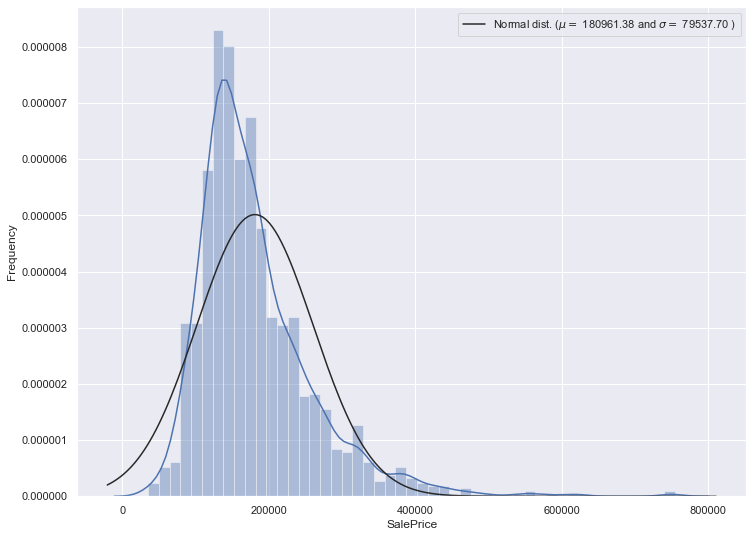

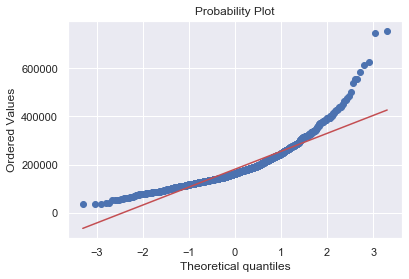

In [21]:
#Plotting the Distplot and checking wether the target variable is normally distributed or not
plt.subplots(figsize=(12,9))
sns.distplot(Housing_data['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Housing_data['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(Housing_data['SalePrice'], plot=plt)
plt.show()

As we can see the target variable is not normally distributed, it has to be transformedto make it normally distributed

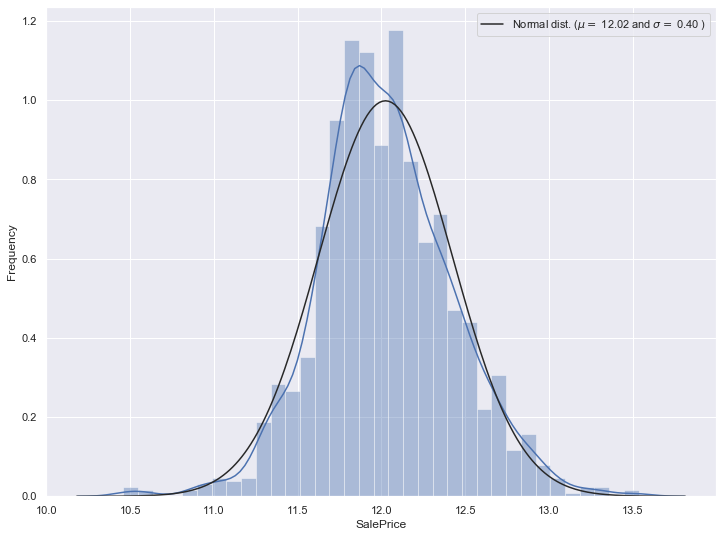

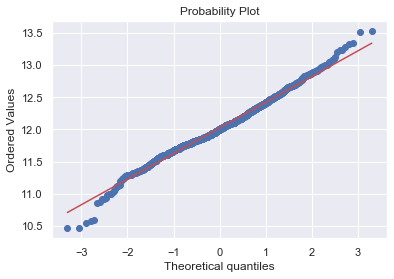

In [22]:
#we use log function which is in numpy
Housing_data['SalePrice'] = np.log1p(Housing_data['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(Housing_data['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Housing_data['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(Housing_data['SalePrice'], plot=plt)
plt.show()

In [23]:
#Checking the number of missing values and printing the columns with missing values
missings_count = {col:Housing_data[col].isnull().sum() for col in Housing_data.columns}
missings = pd.DataFrame.from_dict(missings_count, orient='index')
print(missings.nlargest(20, 0))

                 0
PoolQC        1446
MiscFeature   1399
Alley         1362
Fence         1172
FireplaceQu    686
LotFrontage    258
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
MSSubClass       0


In [24]:
#Checking the shape of the dataframe
Housing_data.shape

(1452, 80)

In [25]:
# Most missings can be understood from the data_description.txt file (i.e. PoolQC missing means no pool). Let's fix this:

def fill_missings(data):
    clean_data = data.copy()

    # Replace missing categorical data with None (strings like Gd = Good, Wd = Wood, etc)
    fill_with_nones = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
          'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
          'MasVnrType']
    for col in fill_with_nones:
        clean_data[col] = clean_data[col].fillna("None")
    
    # Replace some numeric missings with 0
    fill_with_0 = ['MasVnrArea','GarageYrBlt']
    for col in fill_with_0:
        clean_data[col] = clean_data[col].fillna(0)

    # Replace LotFrontage with neighborhood mean
    clean_data["LotFrontage"] = clean_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    # When applies or doubting how to replace, use mode
    clean_data['Electrical'].fillna(clean_data['Electrical'].mode()[0])
    
    return clean_data

In [26]:
#deriving new columns in the dataframe
def create_additional_features(all_data):
        
    # Flags
    all_data['has_pool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    all_data['has_2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    all_data['has_garage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    all_data['has_fireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    all_data['has_bsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    
    # Combine features
    all_data['Year_BuiltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
    all_data['Total_SF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
    all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])
    all_data['Total_Bath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
    all_data['Total_porch_SF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF'])
    
    return all_data

In [27]:
# Before moving to encoding, there are 4 numerical columns that relate to "types" and hence should be considered categories:

def categorize_data(data):
    categorized_data = data.copy()
    categorized_data['MSSubClass'] = categorized_data['MSSubClass'].apply(str)
    categorized_data['OverallCond'] = categorized_data['OverallCond'].astype(str)
    categorized_data['YrSold'] = categorized_data['YrSold'].astype(str)
    categorized_data['MoSold'] = categorized_data['MoSold'].astype(str)
    
    return categorized_data


In [28]:
# Some categorical columns refer to quality or type, and can be encoded into numeric values. 
# Creating a method to perform simple LabelEncoding

def encode_categories(data):

    all_data = data.copy()
    cols_to_encode = ('PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 
            'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 
            'OverallCond', 'YrSold', 'MoSold')

    # Process columns and apply LabelEncoder to categorical features
    for c in cols_to_encode:
        lbl = LabelEncoder() 
        lbl.fit(list(all_data[c].values)) 
        all_data[c] = lbl.transform(list(all_data[c].values))
        
    return all_data

In [29]:
# Preprocessing
#sending the data to the created functions and storing the data to a variable
train_data = fill_missings(Housing_data)
train_data = create_additional_features(train_data)
train_data = categorize_data(train_data)
train_data = encode_categories(train_data)

In [30]:
#Storing the Salesprice column data to y variable and dropping the variable from the train datafarme
y = train_data.SalePrice     
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [31]:
#Reassigning the data to new variables
X = train_data
Y = y

In [32]:
# Drop columns that would lead to overfitting
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)


In [33]:
#Checking the shape of the X dataframe
X.shape

(1452, 89)

In [34]:
#Checking the shape of the Y dataframe
Y.shape

(1452,)

In [35]:
#Checking the datatype of each columns in the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 89 columns):
MSSubClass            1452 non-null int64
MSZoning              1452 non-null object
LotFrontage           1452 non-null float64
LotArea               1452 non-null int64
Street                1452 non-null int64
Alley                 1452 non-null int64
LotShape              1452 non-null int64
LandContour           1452 non-null object
Utilities             1452 non-null object
LotConfig             1452 non-null object
LandSlope             1452 non-null int64
Neighborhood          1452 non-null object
Condition1            1452 non-null object
Condition2            1452 non-null object
BldgType              1452 non-null object
HouseStyle            1452 non-null object
OverallQual           1452 non-null int64
OverallCond           1452 non-null int64
YearBuilt             1452 non-null int64
YearRemodAdd          1452 non-null int64
RoofStyle             1452 non-null object

In [36]:
#describing the dataset
X.describe()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,has_pool,has_2ndfloor,has_garage,has_fireplace,has_bsmt,Year_BuiltAndRemod,Total_SF,Total_sqr_footage,Total_Bath,Total_porch_SF
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,6.201791,69.917011,10441.754821,0.996556,0.993113,1.941460,0.061983,6.098485,4.578512,1971.296832,...,0.004132,0.431818,0.944215,0.527548,0.974518,3956.160468,2556.119835,1989.341598,2.206956,180.850551
std,3.536740,21.464293,9859.986871,0.058601,0.248955,1.409827,0.275863,1.373902,1.113184,30.137259,...,0.064172,0.495500,0.229585,0.499413,0.157638,45.558073,773.529734,722.794947,0.777687,155.693156
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3830.000000,334.000000,334.000000,1.000000,0.000000
25%,4.000000,60.000000,7538.750000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1954.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,3922.000000,2009.500000,1493.000000,2.000000,45.000000
50%,5.000000,70.000000,9468.500000,1.000000,1.000000,3.000000,0.000000,6.000000,4.000000,1973.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,3955.000000,2472.000000,1861.500000,2.000000,164.000000
75%,9.000000,80.000000,11560.750000,1.000000,1.000000,3.000000,0.000000,7.000000,5.000000,2000.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,4001.250000,3000.750000,2374.500000,2.500000,265.000000
max,14.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,2.000000,10.000000,8.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4020.000000,6872.000000,6572.000000,6.000000,1027.000000


In [37]:
#creating 2 dataframes one with only columns related to Object type and other wrt numeric type
categorical_features = X.select_dtypes(include = ["object"]).columns
numerical_features = X.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 68
Categorical features : 21


In [38]:
#Resaaigning the variables
X_num = X[numerical_features]
X_cat = X[categorical_features]

In [39]:
#Storing the cagorical columns into col variable
col = X_cat.columns

In [40]:
#Checking for missing values
(X.isnull().sum()).tail(50)

HeatingQC             0
CentralAir            0
Electrical            1
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
BsmtFullBath          0
BsmtHalfBath          0
FullBath              0
HalfBath              0
BedroomAbvGr          0
KitchenAbvGr          0
KitchenQual           0
TotRmsAbvGrd          0
Functional            0
Fireplaces            0
FireplaceQu           0
GarageType            0
GarageYrBlt           0
GarageFinish          0
GarageCars            0
GarageArea            0
GarageQual            0
GarageCond            0
PavedDrive            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
PoolQC                0
Fence                 0
MiscFeature           0
MiscVal               0
MoSold                0
YrSold                0
SaleType              0
SaleCondition         0
has_pool              0
has_2ndfloor    

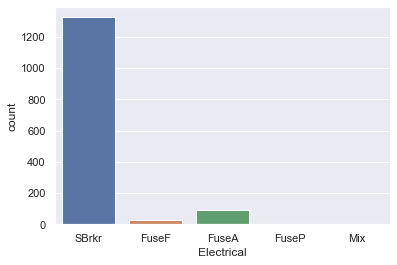

In [41]:
#Plotting the count plot for the Electrical column
sns.countplot(X_cat['Electrical'])

In [42]:
#replacing the 1 missing value with SBrkr
X_cat['Electrical'].replace(np.nan,'SBrkr', inplace = True)

In [43]:
#Checking the presence of missing values
str(X_cat.isnull().values.sum())

'0'

In [44]:
#getting the head of the dataframe
X_cat.head(5)

,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
1,RL,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
3,RL,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml
4,RL,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal


In [45]:
#Getting the shape of the dataframe
X_cat.shape

(1452, 21)

In [46]:
#Checking the datatypes of each column
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 21 columns):
MSZoning         1452 non-null object
LandContour      1452 non-null object
Utilities        1452 non-null object
LotConfig        1452 non-null object
Neighborhood     1452 non-null object
Condition1       1452 non-null object
Condition2       1452 non-null object
BldgType         1452 non-null object
HouseStyle       1452 non-null object
RoofStyle        1452 non-null object
RoofMatl         1452 non-null object
Exterior1st      1452 non-null object
Exterior2nd      1452 non-null object
MasVnrType       1452 non-null object
Foundation       1452 non-null object
Heating          1452 non-null object
Electrical       1452 non-null object
GarageType       1452 non-null object
MiscFeature      1452 non-null object
SaleType         1452 non-null object
SaleCondition    1452 non-null object
dtypes: object(21)
memory usage: 238.3+ KB


In [47]:
#Checking the head of X_num dataframe
X_num.head(5)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,has_pool,has_2ndfloor,has_garage,has_fireplace,has_bsmt,Year_BuiltAndRemod,Total_SF,Total_sqr_footage,Total_Bath,Total_porch_SF
0,9,65.0,8450,1,1,3,0,7,4,2003,...,0,1,1,0,1,4006,2566,2416,3.5,61
1,4,80.0,9600,1,1,3,0,6,7,1976,...,0,0,1,1,1,3952,2524,2240,2.5,298
2,9,68.0,11250,1,1,0,0,7,4,2001,...,0,1,1,1,1,4003,2706,2272,3.5,42
3,10,60.0,9550,1,1,0,0,7,4,1915,...,0,1,1,1,1,3885,2473,1933,2.0,307
4,9,84.0,14260,1,1,0,0,8,4,2000,...,0,1,1,1,1,4000,3343,2853,3.5,276


In [48]:
#Checking the shape of the dataframe
X_num.shape

(1452, 68)

In [49]:
#Checking the datatype of each column in the X_num dataframe
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 68 columns):
MSSubClass            1452 non-null int64
LotFrontage           1452 non-null float64
LotArea               1452 non-null int64
Street                1452 non-null int64
Alley                 1452 non-null int64
LotShape              1452 non-null int64
LandSlope             1452 non-null int64
OverallQual           1452 non-null int64
OverallCond           1452 non-null int64
YearBuilt             1452 non-null int64
YearRemodAdd          1452 non-null int64
MasVnrArea            1452 non-null float64
ExterQual             1452 non-null int64
ExterCond             1452 non-null int64
BsmtQual              1452 non-null int64
BsmtCond              1452 non-null int64
BsmtExposure          1452 non-null int64
BsmtFinType1          1452 non-null int64
BsmtFinSF1            1452 non-null int64
BsmtFinType2          1452 non-null int64
BsmtFinSF2            1452 non-null int64
BsmtUnf

In [50]:
#Checking the description of the dataframe
X_num.describe()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,has_pool,has_2ndfloor,has_garage,has_fireplace,has_bsmt,Year_BuiltAndRemod,Total_SF,Total_sqr_footage,Total_Bath,Total_porch_SF
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,6.201791,69.917011,10441.754821,0.996556,0.993113,1.941460,0.061983,6.098485,4.578512,1971.296832,...,0.004132,0.431818,0.944215,0.527548,0.974518,3956.160468,2556.119835,1989.341598,2.206956,180.850551
std,3.536740,21.464293,9859.986871,0.058601,0.248955,1.409827,0.275863,1.373902,1.113184,30.137259,...,0.064172,0.495500,0.229585,0.499413,0.157638,45.558073,773.529734,722.794947,0.777687,155.693156
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3830.000000,334.000000,334.000000,1.000000,0.000000
25%,4.000000,60.000000,7538.750000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1954.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,3922.000000,2009.500000,1493.000000,2.000000,45.000000
50%,5.000000,70.000000,9468.500000,1.000000,1.000000,3.000000,0.000000,6.000000,4.000000,1973.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,3955.000000,2472.000000,1861.500000,2.000000,164.000000
75%,9.000000,80.000000,11560.750000,1.000000,1.000000,3.000000,0.000000,7.000000,5.000000,2000.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,4001.250000,3000.750000,2374.500000,2.500000,265.000000
max,14.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,2.000000,10.000000,8.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4020.000000,6872.000000,6572.000000,6.000000,1027.000000


In [51]:
#Creating the dummy variables
X_cat1 = pd.get_dummies(X_cat)
X_cat1.shape

(1452, 163)

In [52]:
#Concating the categorical and numeric columns and assigning it to X_f variable
X_f = pd.concat([X_cat1,X_num],axis=1)
X_f.shape

(1452, 231)

In [53]:
#importing the libraries required for modeling
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

from sklearn.metrics import mean_squared_error, make_scorer

In [54]:
#importing the standard scaler library and scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_f)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
#dividing the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_f, Y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [56]:
# linear regression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9480083751993118

In [57]:
#fitting the model and checking the r2 for the prediction 
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8851192694442003

# Lasso Regression

In [58]:
# lasso regression
lm_l = Lasso(alpha=0.001)
lm_l.fit(X_train, y_train)

# predict
y_train_pred = lm_l.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_l.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9346106352293057
0.9086696636257946


In [59]:
# lasso model parameters
model_parameters = list(lm_l.coef_)
model_parameters.insert(0, lm_l.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_f.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.643),
 ('MSZoning_C (all)', -0.15),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.009),
 ('MSZoning_RM', -0.048),
 ('LandContour_Bnk', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_AllPub', 0.0),
 ('Utilities_NoSeWa', 0.0),
 ('LotConfig_Corner', 0.0),
 ('LotConfig_CulDSac', 0.028),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.037),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.079),
 ('Neighborhood_Edwards', -0.013),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', -0.005),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', 0.0),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_NWAmes', -0.007),
 ('Neighborhood_NoRidge', -0.0),
 ('Neighborhood_Nr

In [60]:
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0,50.0,100.0]}

# grid search
# lasso model
model_l = Lasso()
model_cv = GridSearchCV(estimator = model_l, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 50.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [61]:
#Printing the parameter dataframe
cv_results_l = pd.DataFrame(model_cv.cv_results_)
cv_results_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.600687,0.202525,0.004598,0.000799,0.001,{'alpha': 0.001},0.892801,0.944543,0.925461,0.924616,...,0.914877,0.021671,1,0.939900,0.932501,0.934439,0.937058,0.939127,0.936605,0.002791
1,0.483549,0.042819,0.005596,0.002243,0.01,{'alpha': 0.01},0.857671,0.921859,0.900300,0.902589,...,0.887990,0.025892,2,0.906184,0.900165,0.903871,0.902387,0.914064,0.905334,0.004785
2,0.069963,0.009627,0.003599,0.000490,1,{'alpha': 1.0},0.835151,0.878441,0.842456,0.847467,...,0.838769,0.028347,3,0.848577,0.840047,0.849206,0.848902,0.862861,0.849919,0.007325
3,0.032183,0.002225,0.003598,0.000490,5,{'alpha': 5.0},0.790628,0.789385,0.758559,0.763427,...,0.758809,0.035897,4,0.757120,0.755973,0.764203,0.763904,0.777968,0.763834,0.007833
4,0.028586,0.003260,0.003997,0.000632,10,{'alpha': 10.0},0.781722,0.771944,0.748797,0.750163,...,0.744514,0.039423,5,0.744232,0.741008,0.750545,0.749455,0.765085,0.750065,0.008274


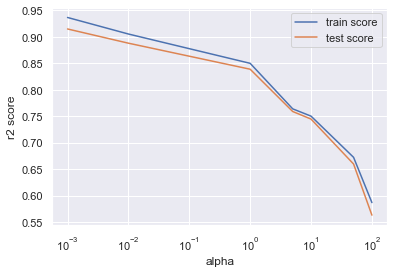

In [62]:
#  plot the parameters to find out the best value for alpha
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='bottom left')
plt.xscale('log')
plt.show()

In [63]:
# model with optimal alpha
# lasso regression
lm_l = Lasso(alpha=0.001)
lm_l.fit(X_train, y_train)

# predict
y_train_pred = lm_l.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_l.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9346106352293057
0.9086696636257946


In [64]:
# lasso model parameters
model_parameters_l = list(lm_l.coef_)
model_parameters_l.insert(0, lm.intercept_)
model_parameters_l = [round(x, 3) for x in model_parameters_l]
cols = X_f.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_l))

[('constant', 4.89),
 ('MSZoning_C (all)', -0.15),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.009),
 ('MSZoning_RM', -0.048),
 ('LandContour_Bnk', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_AllPub', 0.0),
 ('Utilities_NoSeWa', 0.0),
 ('LotConfig_Corner', 0.0),
 ('LotConfig_CulDSac', 0.028),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.037),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.079),
 ('Neighborhood_Edwards', -0.013),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', -0.005),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', 0.0),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_NWAmes', -0.007),
 ('Neighborhood_NoRidge', -0.0),
 ('Neighborhood_Nri

In [65]:
#Storing the columns and model parameters to a variable and the converting it to a dataframe
data_l = list(zip(cols, model_parameters_l))
data_lasso = pd.DataFrame(data_l, columns = ['Housing_data_columns','Lasso_coef'])
data_lasso

,Housing_data_columns,Lasso_coef
0,constant,4.890
1,MSZoning_C (all),-0.150
2,MSZoning_FV,0.000
3,MSZoning_RH,0.000
4,MSZoning_RL,0.009
5,MSZoning_RM,-0.048
6,LandContour_Bnk,0.000
7,LandContour_HLS,0.000
8,LandContour_Low,-0.000
9,LandContour_Lvl,-0.000


In [66]:
#Sorting the data wrt absolute value of the parameters
data_lasso.iloc[(-data_lasso['Lasso_coef'].abs()).argsort()].head(11)

,Housing_data_columns,Lasso_coef
0,constant,4.890
1,MSZoning_C (all),-0.150
23,Neighborhood_Crawfor,0.079
158,SaleCondition_Abnorml,-0.069
39,Neighborhood_StoneBr,0.055
155,SaleType_New,0.054
171,OverallQual,0.052
5,MSZoning_RM,-0.048
88,Exterior1st_BrkFace,0.046
172,OverallCond,0.045


# Ridge Regression

In [67]:
# Ridge regression
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9480083438463442
0.8851978272489474


In [68]:
# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0,50.0,100.0]}

# grid search
# Ridge model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 50.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [69]:
#printing the patameters dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028984,0.000894,0.004998,0.000632,0.001,{'alpha': 0.001},0.845020,0.911686,0.894327,0.914805,...,0.888939,0.025486,7,0.955572,0.948563,0.951110,0.950234,0.954521,0.952000,0.002640
1,0.031983,0.004732,0.004997,0.000893,0.01,{'alpha': 0.01},0.850678,0.914596,0.895126,0.915431,...,0.891131,0.024174,6,0.955510,0.948552,0.951107,0.950229,0.954517,0.951983,0.002626
2,0.037380,0.006435,0.005398,0.000799,1,{'alpha': 1.0},0.872842,0.932192,0.914690,0.922551,...,0.906844,0.021576,5,0.953746,0.946898,0.949485,0.949173,0.953584,0.950577,0.002675
3,0.036780,0.006612,0.006997,0.001999,5,{'alpha': 5.0},0.881301,0.938462,0.922848,0.925797,...,0.912586,0.021222,3,0.949546,0.942644,0.945230,0.945392,0.950561,0.946675,0.002944
4,0.026386,0.002868,0.004398,0.001854,10,{'alpha': 10.0},0.884273,0.940465,0.923707,0.926230,...,0.913674,0.021148,1,0.946637,0.939571,0.942496,0.942626,0.948285,0.943923,0.003132


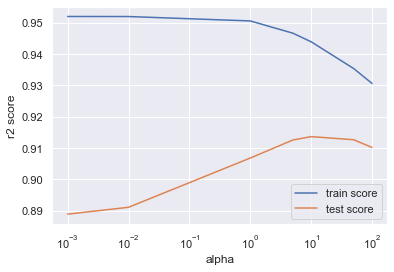

In [70]:
# plot the parameters to find out the best value for alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='bottom left')
plt.xscale('log')
plt.show()

In [71]:
# model with optimal alpha
# Ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9420725421561454
0.9044736316282481


In [72]:
# Ridge model parameters
model_parameters_r = list(lm.coef_)
model_parameters_r.insert(0, lm.intercept_)
model_parameters_r = [round(x, 3) for x in model_parameters_r]
cols = X_f.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_r))

[('constant', 5.01),
 ('MSZoning_C (all)', -0.109),
 ('MSZoning_FV', 0.035),
 ('MSZoning_RH', 0.033),
 ('MSZoning_RL', 0.047),
 ('MSZoning_RM', -0.006),
 ('LandContour_Bnk', 0.003),
 ('LandContour_HLS', 0.01),
 ('LandContour_Low', -0.009),
 ('LandContour_Lvl', -0.004),
 ('Utilities_AllPub', 0.0),
 ('Utilities_NoSeWa', 0.0),
 ('LotConfig_Corner', -0.002),
 ('LotConfig_CulDSac', 0.035),
 ('LotConfig_FR2', -0.022),
 ('LotConfig_FR3', -0.002),
 ('LotConfig_Inside', -0.008),
 ('Neighborhood_Blmngtn', -0.016),
 ('Neighborhood_Blueste', -0.001),
 ('Neighborhood_BrDale', -0.003),
 ('Neighborhood_BrkSide', 0.043),
 ('Neighborhood_ClearCr', 0.02),
 ('Neighborhood_CollgCr', -0.023),
 ('Neighborhood_Crawfor', 0.079),
 ('Neighborhood_Edwards', -0.041),
 ('Neighborhood_Gilbert', -0.019),
 ('Neighborhood_IDOTRR', -0.034),
 ('Neighborhood_MeadowV', -0.059),
 ('Neighborhood_Mitchel', -0.029),
 ('Neighborhood_NAmes', -0.014),
 ('Neighborhood_NPkVill', 0.016),
 ('Neighborhood_NWAmes', -0.032),
 ('Neighbo

In [73]:
#Storing the columns and model parameters to a variable and the converting it to a dataframe
data_r = list(zip(cols, model_parameters_r))
data_ridge = pd.DataFrame(data_r, columns = ['Housing_data_columns','Ridge_coef'])
data_ridge

,Housing_data_columns,Ridge_coef
0,constant,5.010
1,MSZoning_C (all),-0.109
2,MSZoning_FV,0.035
3,MSZoning_RH,0.033
4,MSZoning_RL,0.047
5,MSZoning_RM,-0.006
6,LandContour_Bnk,0.003
7,LandContour_HLS,0.010
8,LandContour_Low,-0.009
9,LandContour_Lvl,-0.004


In [74]:
#Sorting the dataframe wrt absolute value of the coefficients column
data_ridge.iloc[(-data_ridge['Ridge_coef'].abs()).argsort()].head(11)

,Housing_data_columns,Ridge_coef
0,constant,5.010
1,MSZoning_C (all),-0.109
23,Neighborhood_Crawfor,0.079
39,Neighborhood_StoneBr,0.072
27,Neighborhood_MeadowV,-0.059
88,Exterior1st_BrkFace,0.052
188,CentralAir,0.050
158,SaleCondition_Abnorml,-0.048
4,MSZoning_RL,0.047
171,OverallQual,0.047


### For Lasso Regression the optimal value is 0.001, and the optimum value for Ridge Regression is 10.

### The top 10 variables that are significant in predicting the price of a house wrt ridge regression are:
1. MSZoning_C (all)
2. Neighborhood_Crawfor
3. Neighborhood_StoneBr
4. Neighborhood_MeadowV
5. Exterior1st_BrkFace
6. CentralAir
7. SaleCondition_Abnorml
8. OverallQual
9. KitchenAbvGr
10. MSZoning_RL

### The top 10 variables that are significant in predicting the price of a house wrt Lasso regression are:
1. MSZoning_C (all)
2. Neighborhood_Crawfor
3. SaleCondition_Abnorml
4. Neighborhood_StoneBr
5. SaleType_New
6. OverallQual
7. MSZoning_RM
8. Exterior1st_BrkFace
9. OverallCond
10. CentralAir

### The top 10 variables that are significant in predicting the price of a house wrt Lasso regression along with their coefficient value:

   Variable name    :  Coefficient value
1. MSZoning_C (all)	   :    -0.150
2. Neighborhood_Crawfor	:    0.079
3. SaleCondition_Abnorml :  -0.069
4. Neighborhood_StoneBr	  :  0.055
5. SaleType_New	          :  0.054
6. OverallQual	          :  0.052
7. MSZoning_RM	          : -0.048
8. Exterior1st_BrkFace	  :  0.046
9. OverallCond	          :  0.045
10. CentralAir	          :  0.039


### The top 10 variables that are significant in predicting the price of a house wrt Ridge regression along with their coefficient value:

    Variable name    : Coefficient value
1. MSZoning_C (all)	  :     -0.109
2. Neighborhood_Crawfor:	 0.079
3. Neighborhood_StoneBr	:    0.072
4. Neighborhood_MeadowV	 :  -0.059
5. Exterior1st_BrkFace	 :   0.052
6. CentralAir	         :   0.050
7. SaleCondition_Abnorml :  -0.048
8. OverallQual	          :  0.047
9. KitchenAbvGr	         :  -0.047
10. MSZoning_RL	          :  0.047